# Spectral plots

## 3D projection plot

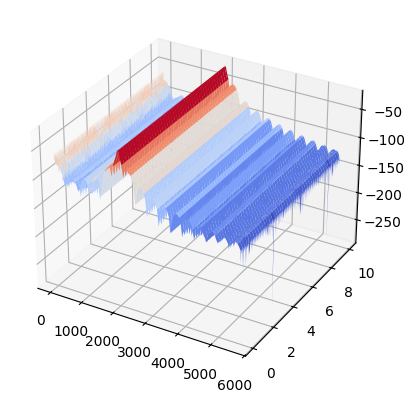

In [2]:
# 3D plotting code adapted from 
# https://stackoverflow.com/questions/56788798/python-spectrogram-in-3d-like-matlabs-spectrogram-function/67003133#67003133
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal # spectrogram function
from matplotlib import cm # colour map

# basic config
sample_rate = 11240.  # 
sig_len_secs = 10
frequency = 2000.

# generate the signal
timestamps_secs = np.arange(sample_rate*sig_len_secs) / sample_rate
mysignal = np.sin(2.0 * np.pi * frequency * timestamps_secs) 

# extract the spectrum
freq_bins, timestamps, spec = signal.spectrogram(mysignal, sample_rate)

# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Cách mới
ax.plot_surface(freq_bins[:, None], timestamps[None, :], 10.0*np.log10(spec), cmap=cm.coolwarm) # type: ignore
plt.show()

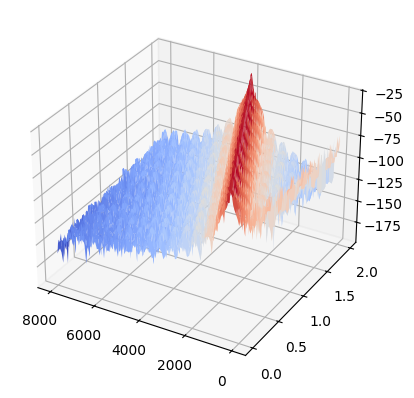

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal # spectrogram function
from matplotlib import cm # colour map
import librosa as lr
import librosa.display


# basic config
sample_rate = 16000.  # 
sig_len_secs = 10
frequency = 2000.

# generate the signal
timestamps_secs = np.arange(sample_rate*sig_len_secs) / sample_rate
mysignal = np.sin(2.0 * np.pi * frequency * timestamps_secs) 
# you will need to adjust the filename 
# so it points to a file you hvae
mysignal = lr.load('../Sounds/3_002_sound.wav', sr=sample_rate)[0]

# extract the spectrum
freq_bins, timestamps, spec = signal.spectrogram(mysignal, sample_rate)

# 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # type: ignore
ax.plot_surface(freq_bins[:, None], timestamps[None, :], 10.0*np.log10(spec), cmap=cm.coolwarm) # type: ignore
ax.invert_xaxis()
plt.show()

## Quick demo of dB scale vs. linear amplitude scale

Text(0, 0.5, 'dB (20 * log10 amp)')

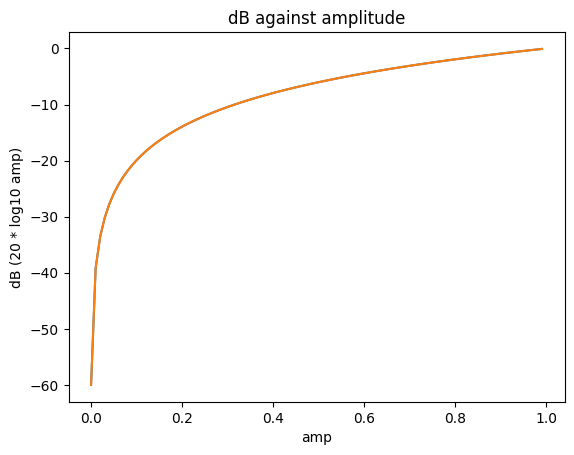

In [6]:
a = np.arange(0.001, 1.0, 0.01)
plt.plot(a, lr.amplitude_to_db(a))
plt.plot(a, 20 * np.log10(a))

plt.title("dB against amplitude")
plt.xlabel('amp')
plt.ylabel('dB (20 * log10 amp)')




## Spectral plot with librosa

In [7]:
def plot_spec(sig, samplerate=22050, range=[0, 1000]):
    spec = lr.stft(sig)
    spec = lr.amplitude_to_db(np.abs(spec), ref=np.max)   

    fig, ax = plt.subplots()

    img = lr.display.specshow(spec, x_axis='time', y_axis='hz', ax=ax)
    fig.colorbar(img, ax=ax, format="%+2.0f dB")
    plt.ylim(range)

    

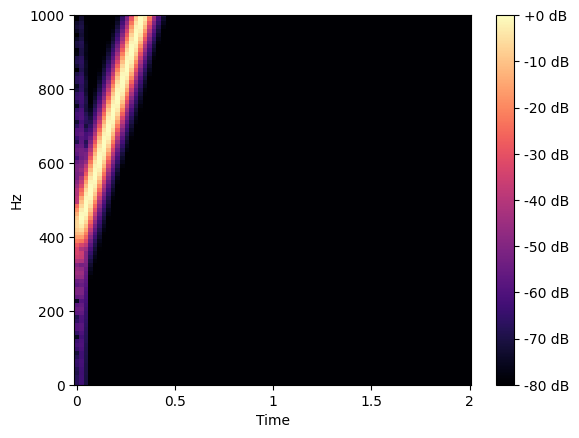

In [8]:
# remember to adjust the filename
hello = lr.load('../Sounds/3_002_sound.wav', sr=22050)
plot_spec(hello[0], range=[0, 1000])

## Spectrograms of different periodic signals

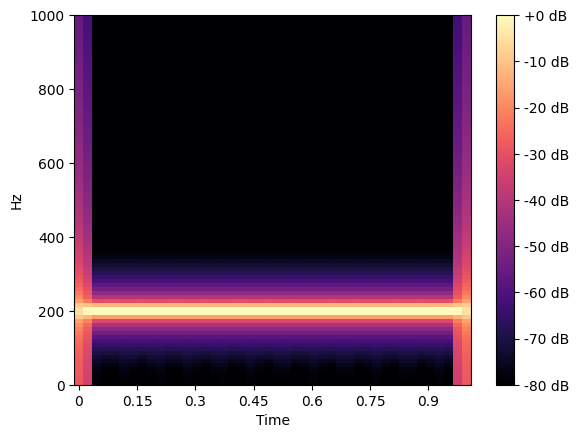

In [9]:
samplerate = 22050
length = 1 # seconds
freq = 200
sine_sig = [np.sin(phase*freq) for phase in np.arange(0, np.pi * 2, (np.pi * 2) / samplerate)]
sine_sig = np.array(sine_sig)
                                            
plot_spec(sine_sig)

(0.0, 200.0)

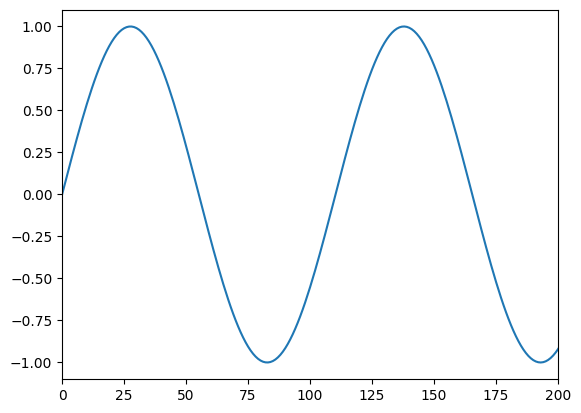

In [11]:
plt.plot(sine_sig)
plt.xlim(0, 200)

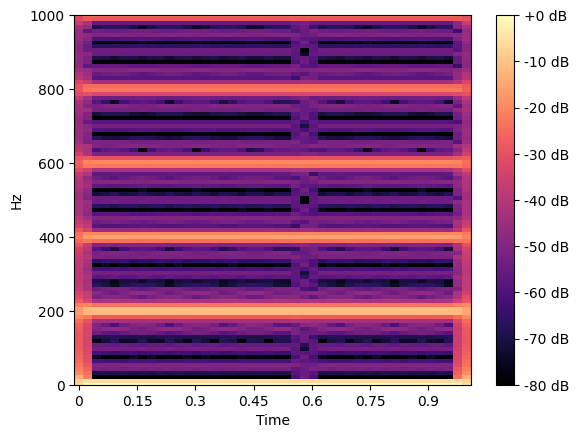

In [16]:
samplerate = 22050
freq = 200

saw_sig = [(freq * phase)%1.0 for phase in np.arange(0, 1, 1 / samplerate)]
saw_sig = np.array(saw_sig)                            
plot_spec(saw_sig, range=[0, 1000])

(0.0, 200.0)

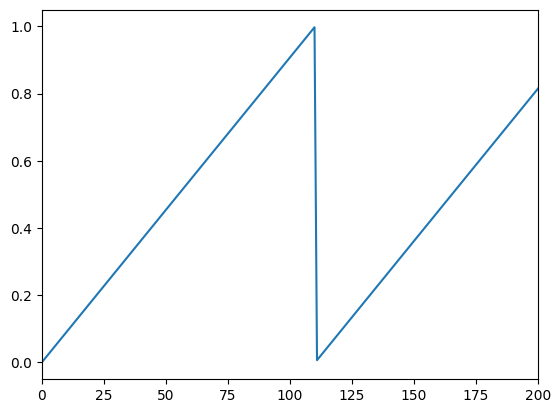

In [13]:
plt.plot(saw_sig)
plt.xlim(0, 200)

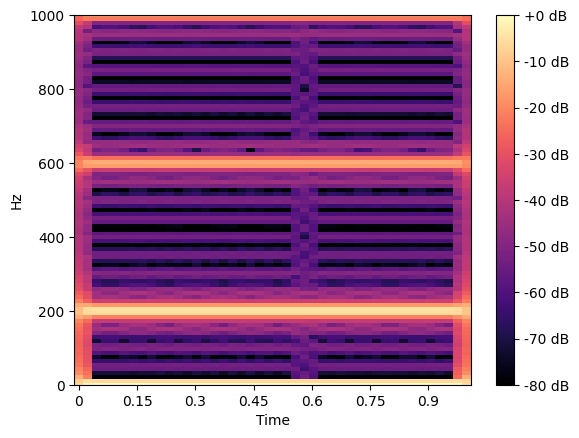

In [17]:
samplerate = 22050
freq = 200

vals = {True:1.0, False:0.0}
pulse_sig = [vals[((freq * phase)%1.0)>0.5] for phase in np.arange(0, 1, 1 / samplerate)]

pulse_sig = np.array(pulse_sig)

#print(pulse_sig)
plot_spec(pulse_sig, range=[0, 1000])

(0.0, 200.0)

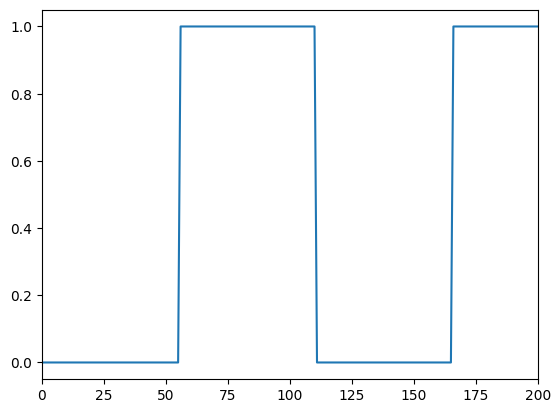

In [19]:
plt.plot(pulse_sig)
plt.xlim(0, 200)

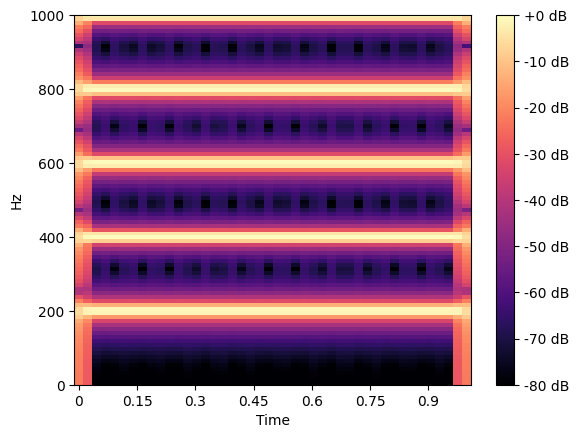

In [20]:
samplerate = 22050
length = 1 # seconds
freq = 200
sine_sig = [
    np.sin(phase*freq) + 
    np.sin(phase*freq*2) +
    np.sin(phase*freq*3) +
    np.sin(phase*freq*4) +
    np.sin(phase*freq*5)    
    for phase in np.arange(0, np.pi * 2, (np.pi * 2) / samplerate)]

sine_sig = np.array(sine_sig)
                                            
plot_spec(sine_sig)

(0.0, 200.0)

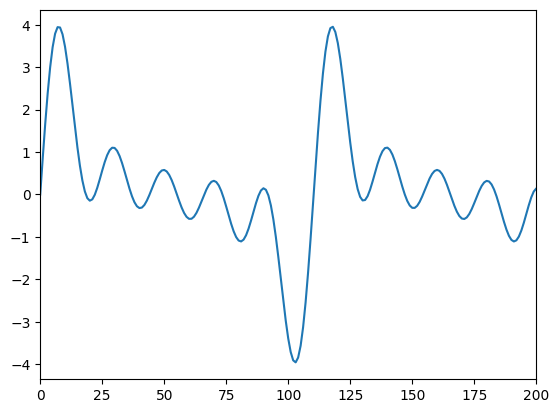

In [21]:
plt.plot(sine_sig)
plt.xlim(0, 200)

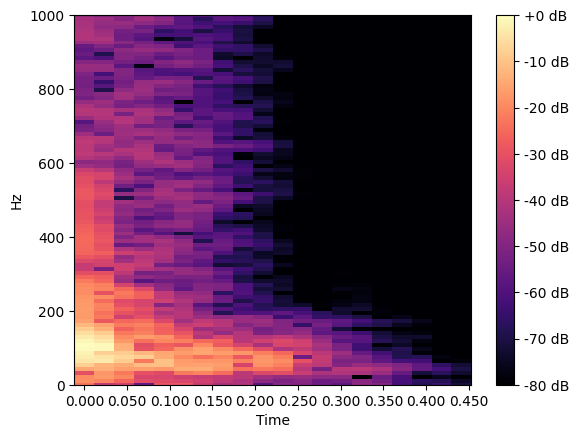

In [32]:
voice_sig = np.array(lr.load('../Sounds/41424__sandyrb__mtfp-kick-001.wav', sr=22050)[0])
plot_spec(voice_sig)

(0.0, 10000.0)

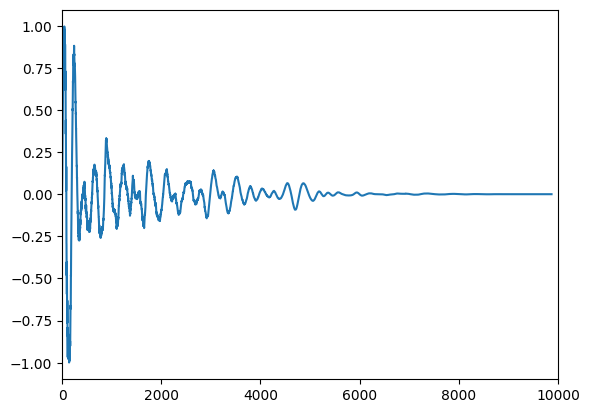

In [ ]:
plt.plot(voice_sig)
plt.xlim(0, 10000)